<a href="https://colab.research.google.com/github/yuvrajkhanna13/cricketapp/blob/main/Cricket_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()

Saving odi_batting_cleaned.csv to odi_batting_cleaned (1).csv
Saving odi_bowling_cleaned.csv to odi_bowling_cleaned (1).csv
Saving odi_fow_cleaned.csv to odi_fow_cleaned (1).csv
Saving odi_matches_cleaned.csv to odi_matches_cleaned (1).csv
Saving odi_partnership_cleaned.csv to odi_partnership_cleaned (1).csv
Saving players_info.csv to players_info.csv
Saving t20_batting_cleaned.csv to t20_batting_cleaned (1).csv
Saving t20_bowling_cleaned.csv to t20_bowling_cleaned (1).csv
Saving t20_fow_cleaned.csv to t20_fow_cleaned (1).csv
Saving t20_matches_cleaned.csv to t20_matches_cleaned (1).csv
Saving t20_partnership_cleaned.csv to t20_partnership_cleaned (1).csv


In [23]:

# Load player info
players_df = pd.read_csv('players_info.csv')  # Should contain: player_id, player_name

# File list with correct columns to merge on
files_info = [
    {'filename': 't20_batting_cleaned.csv', 'keys': ['batsman']},
    {'filename': 't20_bowling_cleaned.csv', 'keys': ['bowler_id']},
    {'filename': 't20_partnership_cleaned.csv', 'keys': ['player1', 'player2']},
    {'filename': 't20_matches_cleaned.csv', 'keys': []},

    {'filename': 'odi_batting_cleaned.csv', 'keys': ['batsman']},
    {'filename': 'odi_bowling_cleaned.csv', 'keys': ['bowler_id']},
    {'filename': 'odi_partnership_cleaned.csv', 'keys': ['player1', 'player2']},
    {'filename': 'odi_matches_cleaned.csv', 'keys': []}
]

for file in files_info:
    fname = file['filename']
    keys = file['keys']
    df = pd.read_csv(fname)

    print(f"🔄 Processing: {fname}")

    if not keys:
        print(f"⚠️  No merge needed for {fname} (no player columns).")
    elif keys == ['batsman']:
        if 'batsman' in df.columns:
            df = df.merge(players_df.rename(columns={'player_id': 'batsman', 'player_name': 'batsman_name'}), on='batsman', how='left')
        else:
            print(f"❌ Skipping {fname} — column 'batsman' not found.")
            continue
    elif keys == ['bowler_id']:
        if 'bowler_id' in df.columns:
            df = df.merge(players_df.rename(columns={'player_id': 'bowler_id', 'player_name': 'bowler_name'}), on='bowler_id', how='left')
        else:
            print(f"❌ Skipping {fname} — column 'bowler_id' not found.")
            continue
    elif keys == ['player1', 'player2']:
        if 'player1' in df.columns and 'player2' in df.columns:
            df = df.merge(players_df.rename(columns={'player_id': 'player1', 'player_name': 'player1_name'}), on='player1', how='left')
            df = df.merge(players_df.rename(columns={'player_id': 'player2', 'player_name': 'player2_name'}), on='player2', how='left')
        else:
            print(f"❌ Skipping {fname} — one of 'player1' or 'player2' not found.")
            continue

    # Save merged version
    outname = f'merged_{fname}'
    df.to_csv(outname, index=False)
    print(f"✅ Saved: {outname}\n")


🔄 Processing: t20_batting_cleaned.csv
✅ Saved: merged_t20_batting_cleaned.csv

🔄 Processing: t20_bowling_cleaned.csv
✅ Saved: merged_t20_bowling_cleaned.csv

🔄 Processing: t20_partnership_cleaned.csv
✅ Saved: merged_t20_partnership_cleaned.csv

🔄 Processing: t20_matches_cleaned.csv
⚠️  No merge needed for t20_matches_cleaned.csv (no player columns).
✅ Saved: merged_t20_matches_cleaned.csv

🔄 Processing: odi_batting_cleaned.csv
✅ Saved: merged_odi_batting_cleaned.csv

🔄 Processing: odi_bowling_cleaned.csv
✅ Saved: merged_odi_bowling_cleaned.csv

🔄 Processing: odi_partnership_cleaned.csv
✅ Saved: merged_odi_partnership_cleaned.csv

🔄 Processing: odi_matches_cleaned.csv
⚠️  No merge needed for odi_matches_cleaned.csv (no player columns).
✅ Saved: merged_odi_matches_cleaned.csv



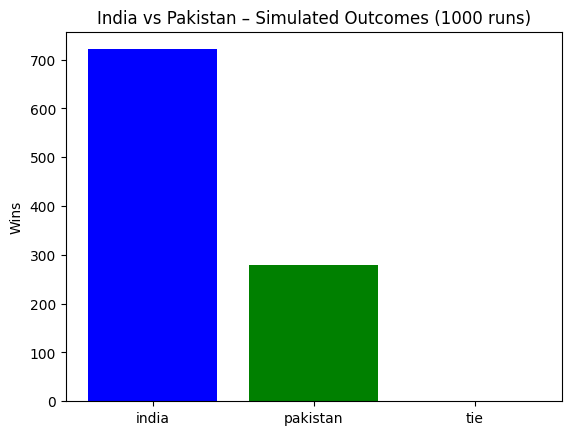

{'india': 721, 'pakistan': 279, 'tie': 0}

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("merged_t20_matches_cleaned.csv")
df['team1_name'] = df['team1_name'].str.lower().str.strip()
df['team2_name'] = df['team2_name'].str.lower().str.strip()
df['match_winner'] = df['match_winner'].str.lower().str.strip()

def simulate_t20(team1, team2, n=1000):
    team1 = team1.lower().strip()
    team2 = team2.lower().strip()


    matches = df[((df['team1_name'] == team1) & (df['team2_name'] == team2)) |
                 ((df['team1_name'] == team2) & (df['team2_name'] == team1))]

    if matches.empty:
        print("❌ No match data found.")
        return

    win_counts = {team1: 0, team2: 0, "tie": 0}

    for _ in range(n):
        random_row = matches.sample(1).iloc[0]
        winner = random_row['match_winner']

        if winner == team1:
            win_counts[team1] += 1
        elif winner == team2:
            win_counts[team2] += 1
        else:
            win_counts["tie"] += 1

    plt.bar(win_counts.keys(), win_counts.values(), color=["blue", "green", "gray"])
    plt.title(f"{team1.title()} vs {team2.title()} – Simulated Outcomes ({n} runs)")
    plt.ylabel("Wins")
    plt.show()

    return win_counts

simulate_t20("india", "pakistan")

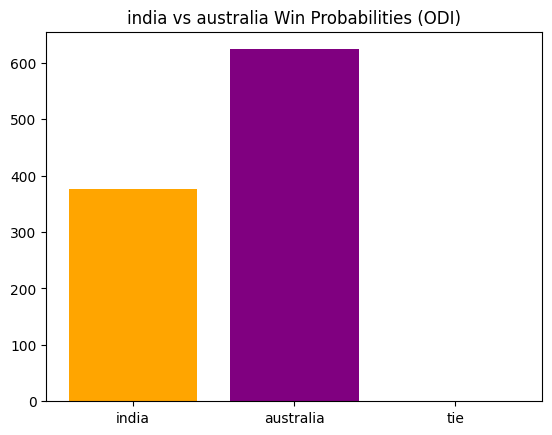

{'india': 376, 'australia': 624, 'tie': 0}

In [25]:
df = pd.read_csv("merged_odi_matches_cleaned.csv")
df['team1_name'] = df['team1_name'].str.lower().str.strip()
df['team2_name'] = df['team2_name'].str.lower().str.strip()
df['match_winner'] = df['match_winner'].str.lower().str.strip()

def simulate_odi(team1, team2, n=1000):
    team1 = team1.lower().strip()
    team2 = team2.lower().strip()
    matches = df[((df['team1_name'] == team1) & (df['team2_name'] == team2)) |
                 ((df['team1_name'] == team2) & (df['team2_name'] == team1))]
    if matches.empty:
        return "No match data"

    win_counts = {team1: 0, team2: 0, "tie": 0}
    for _ in range(n):
        winner = matches.sample(1)['match_winner'].values[0]
        if winner in win_counts:
            win_counts[winner] += 1
        else:
            win_counts["tie"] += 1

    plt.bar(win_counts.keys(), win_counts.values(), color=["orange", "purple", "gray"])
    plt.title(f"{team1} vs {team2} Win Probabilities (ODI)")
    plt.show()
    return win_counts

simulate_odi("india", "australia")


<ipython-input-26-3033593842>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_t20_batting_cleaned.csv")


<Axes: title={'center': 'Top T20 Run Scorers'}, xlabel='batsman'>

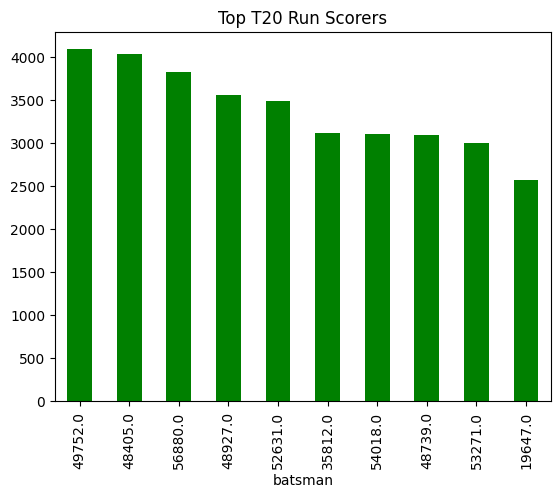

In [26]:
df = pd.read_csv("merged_t20_batting_cleaned.csv")
top_batters = df.groupby("batsman")["runs"].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind="bar", title="Top T20 Run Scorers", color="green")


<Axes: title={'center': 'Top ODI Run Scorers'}, xlabel='batsman'>

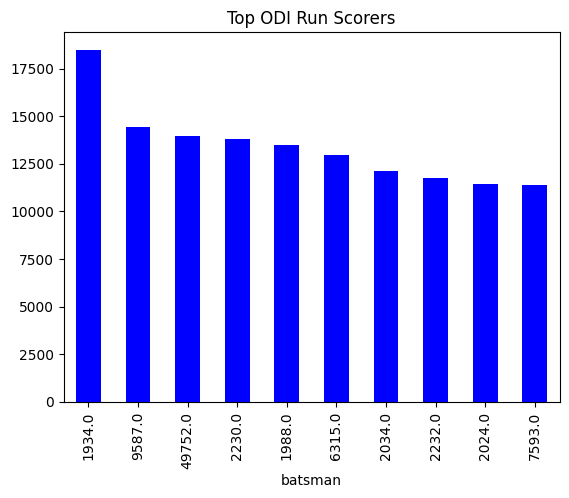

In [27]:
df = pd.read_csv("merged_odi_batting_cleaned.csv")
top_batters = df.groupby("batsman")["runs"].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind="bar", title="Top ODI Run Scorers", color="blue")


<Axes: title={'center': 'Top T20 Wicket Takers'}, xlabel='bowler_id'>

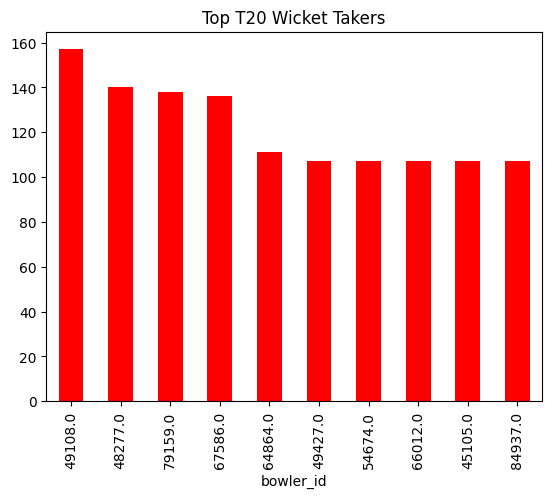

In [28]:
df = pd.read_csv("merged_t20_bowling_cleaned.csv")
top_bowlers = df.groupby("bowler_id")["wickets"].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind="bar", title="Top T20 Wicket Takers", color="red")


<Axes: title={'center': 'Top ODI Wicket Takers'}, xlabel='bowler_id'>

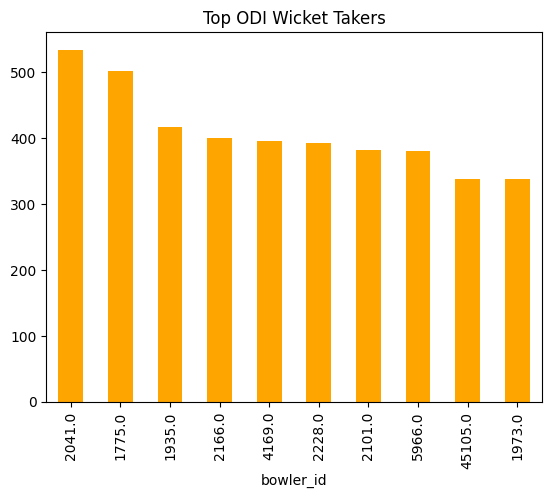

In [29]:
df = pd.read_csv("merged_odi_bowling_cleaned.csv")
top_bowlers = df.groupby("bowler_id")["wickets"].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind="bar", title="Top ODI Wicket Takers", color="orange")


<ipython-input-30-356370921>:1: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_t20_partnership_cleaned.csv")


<Axes: title={'center': 'Top T20 Partnerships'}, ylabel='pair'>

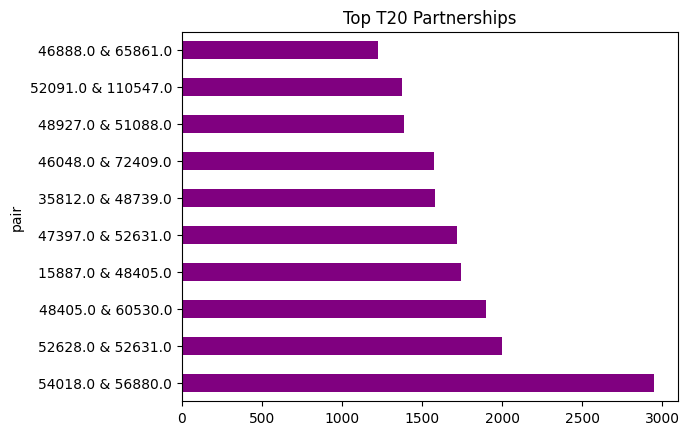

In [30]:
df = pd.read_csv("merged_t20_partnership_cleaned.csv")
df['pair'] = df['player1'].astype(str).str.strip() + " & " + df['player2'].astype(str).str.strip()
top_pairs = df.groupby("pair")["partnership_runs"].sum().sort_values(ascending=False).head(10)
top_pairs.plot(kind="barh", title="Top T20 Partnerships", color="purple")



<ipython-input-31-3255151034>:1: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_odi_partnership_cleaned.csv")


<Axes: title={'center': 'Top ODI Partnerships'}, ylabel='pair'>

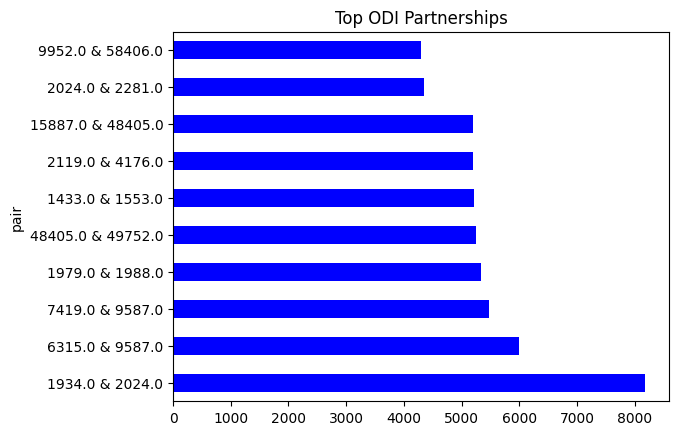

In [31]:
df = pd.read_csv("merged_odi_partnership_cleaned.csv")
df['pair'] = df['player1'].astype(str).str.strip() + " & " + df['player2'].astype(str).str.strip()
top_pairs = df.groupby("pair")["partnership_runs"].sum().sort_values(ascending=False).head(10)
top_pairs.plot(kind="barh", title="Top ODI Partnerships", color="blue")


<Axes: title={'center': 'T20 Fall of Wicket Average Score'}, xlabel='team'>

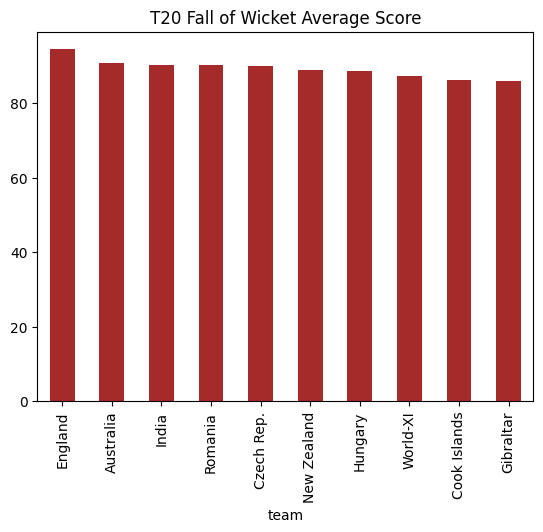

In [32]:
df = pd.read_csv("t20_fow_cleaned.csv")
avg_fow = df.groupby("team")["runs"].mean().sort_values(ascending=False).head(10)
avg_fow.plot(kind="bar", title="T20 Fall of Wicket Average Score", color="brown")


<Axes: title={'center': 'ODI Fall of Wicket Average Score'}, xlabel='team'>

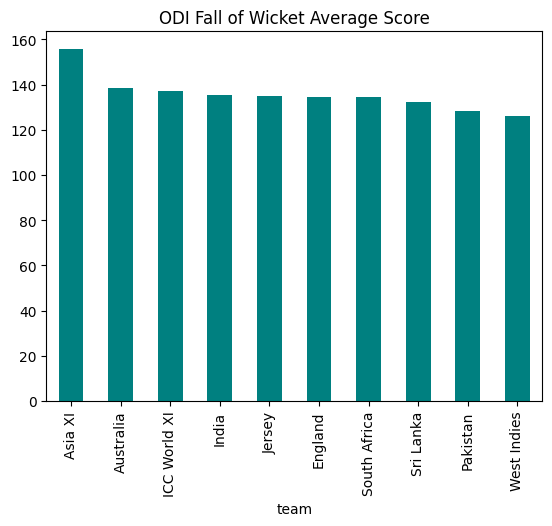

In [33]:
df = pd.read_csv("odi_fow_cleaned.csv")
avg_fow = df.groupby("team")["runs"].mean().sort_values(ascending=False).head(10)
avg_fow.plot(kind="bar", title="ODI Fall of Wicket Average Score", color="teal")


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

df = pd.read_csv("t20_batting_cleaned.csv")

df['runs_scored'] = df['team1_runs_scored'].astype(str).str.strip() + " & " + df['team2_runs_scored'].astype(str).str.strip()

df = df[df['runs_scored'].notnull() & df['batsman'].notnull()]

num_simulations = 1000
overs = 20
balls_per_over = 6
max_balls = overs * balls_per_over

ball_outcomes = df['runs_scored'].values


def simulate_innings():
    total_runs = 0
    wickets = 0
    for ball in range(max_balls):
        run = np.random.choice(ball_outcomes)
        total_runs += run
        if random.random() < 0.05:
            wickets += 1
            if wickets >= 10:
                break
    return total_runs

simulated_scores = [simulate_innings() for _ in range(num_simulations)]

plt.figure(figsize=(10, 5))
plt.hist(simulated_scores, bins=30, color='dodgerblue', edgecolor='black')
plt.title(f"Monte Carlo Simulation of T20 Innings (n={num_simulations})")
plt.xlabel("Total Runs Scored")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("🏏 Monte Carlo Simulation Summary:")
print(f"  • Average score: {np.mean(simulated_scores):.2f}")
print(f"  • Median score : {np.median(simulated_scores)}")
print(f"  • Max score    : {np.max(simulated_scores)}")
print(f"  • Min score    : {np.min(simulated_scores)}")


KeyError: 'team1_runs_scored'

In [35]:

import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = {
    "t20_batting": "t20_batting_cleaned.csv",
    "t20_bowling": "t20_bowling_cleaned.csv",
    "t20_fow": "t20_fow_cleaned.csv",
    "t20_matches": "t20_matches_cleaned.csv",
    "t20_partnership": "t20_partnership_cleaned.csv",
    "odi_batting": "odi_batting_cleaned.csv",
    "odi_bowling": "odi_bowling_cleaned.csv",
    "odi_fow": "odi_fow_cleaned.csv",
    "odi_matches": "odi_matches_cleaned.csv",
    "odi_partnership": "odi_partnership_cleaned.csv"
}

# Load all datasets
data = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Utility Functions
def top_batsmen(df, format_name):
    top = df.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)
    print(f"\n🏏 Top 10 Batters in {format_name}")
    print(top)
    return top

def top_bowlers(df, format_name):
    top = df.groupby('bowler_id')['wickets'].sum().sort_values(ascending=False).head(10)
    print(f"\n🎯 Top 10 Bowlers in {format_name}")
    print(top)
    return top

def top_partnerships(df, format_name):
    df['pair'] = df['player1'].astype(str).str.strip() + " & " + df['player2'].astype(str).str.strip()
    top = df.groupby('pair')['partnership_runs'].sum().sort_values(ascending=False).head(10)
    print(f"\n🤝 Top 10 Partnerships in {format_name}")
    print(top)
    return top

def fow_analysis(df, format_name):
    top = df.groupby('wicket')['runs'].mean().sort_index()
    print(f"\n📉 Average Runs at Fall of Each Wicket ({format_name})")
    print(top)
    return top

def team_wins(df, format_name):
    top = df['match_winner'].value_counts().head(10)
    print(f"\n🏆 Most Successful Teams in {format_name}")
    print(top)
    return top

# Run analysis for both formats
for format_type in ['t20', 'odi']:
    print(f"\n{'='*40}\n🔍 Analyzing {format_type.upper()} Cricket Data\n{'='*40}")
    top_batsmen(data[f'{format_type}_batting'], format_type.upper())
    top_bowlers(data[f'{format_type}_bowling'], format_type.upper())
    top_partnerships(data[f'{format_type}_partnership'], format_type.upper())
    fow_analysis(data[f'{format_type}_fow'], format_type.upper())
    team_wins(data[f'{format_type}_matches'], format_type.upper())




🔍 Analyzing T20 Cricket Data

🏏 Top 10 Batters in T20
batsman
49752.0    4091.0
48405.0    4037.0
56880.0    3832.0
48927.0    3558.0
52631.0    3491.0
35812.0    3120.0
54018.0    3111.0
48739.0    3099.0
53271.0    3008.0
19647.0    2577.0
Name: runs, dtype: float64

🎯 Top 10 Bowlers in T20
bowler_id
49108.0    157.0
48277.0    140.0
79159.0    138.0
67586.0    136.0
64864.0    111.0
49427.0    107.0
54674.0    107.0
66012.0    107.0
45105.0    107.0
84937.0    107.0
Name: wickets, dtype: float64

🤝 Top 10 Partnerships in T20
pair
54018.0 & 56880.0     2949.0
52628.0 & 52631.0     1998.0
48405.0 & 60530.0     1897.0
15887.0 & 48405.0     1742.0
47397.0 & 52631.0     1720.0
35812.0 & 48739.0     1582.0
46048.0 & 72409.0     1573.0
48927.0 & 51088.0     1389.0
52091.0 & 110547.0    1376.0
46888.0 & 65861.0     1228.0
Name: partnership_runs, dtype: float64

📉 Average Runs at Fall of Each Wicket (T20)
wicket
0.0      36.625000
1.0      25.880553
2.0      49.153596
3.0      69.637849
4.0

<ipython-input-38-2400770863>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_t20_batting_cleaned.csv")


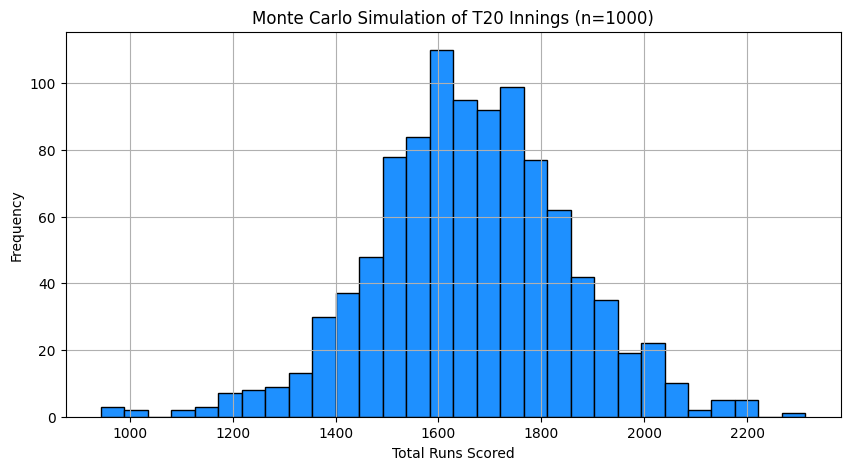

🏏 Monte Carlo Simulation Summary:
  • Average score: 1662.09
  • Median score : 1657.0
  • Max score    : 2313.0
  • Min score    : 944.0


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load batting data
df = pd.read_csv("merged_t20_batting_cleaned.csv")

# Basic preprocessing
df = df[df['runs'].notnull() & df['batsman'].notnull()]

# Set simulation parameters
num_simulations = 1000
overs = 20
balls_per_over = 6
max_balls = overs * balls_per_over

# Create a pool of historical ball-by-ball outcomes
ball_outcomes = df['runs'].values
# Optional: include 0 more often to reflect dot balls or add mode-wicket probability

# Simulate one innings
def simulate_innings():
    total_runs = 0
    wickets = 0
    for ball in range(max_balls):
        run = np.random.choice(ball_outcomes)
        total_runs += run
        # Simulate wicket with 5% probability per ball
        if random.random() < 0.05:
            wickets += 1
            if wickets >= 10:
                break
    return total_runs

# Run the simulation many times
simulated_scores = [simulate_innings() for _ in range(num_simulations)]

# Plot the result
plt.figure(figsize=(10, 5))
plt.hist(simulated_scores, bins=30, color='dodgerblue', edgecolor='black')
plt.title(f"Monte Carlo Simulation of T20 Innings (n={num_simulations})")
plt.xlabel("Total Runs Scored")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Summary stats
print("🏏 Monte Carlo Simulation Summary:")
print(f"  • Average score: {np.mean(simulated_scores):.2f}")
print(f"  • Median score : {np.median(simulated_scores)}")
print(f"  • Max score    : {np.max(simulated_scores)}")
print(f"  • Min score    : {np.min(simulated_scores)}")


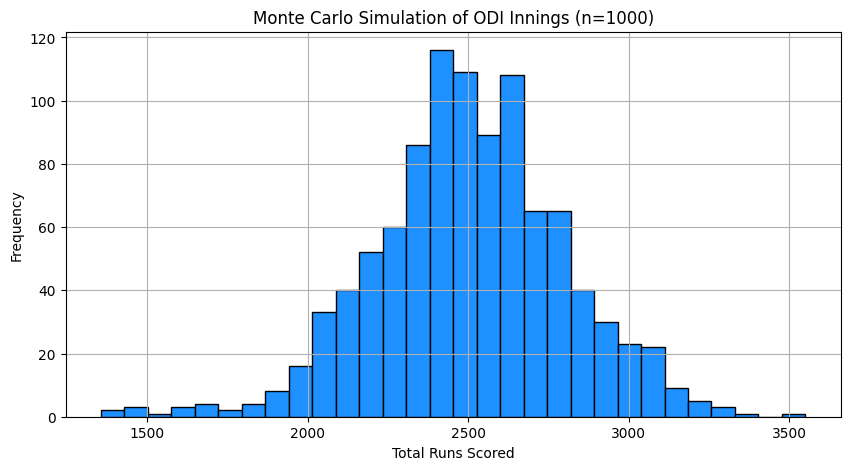

🏏 Monte Carlo Simulation Summary:
  • Average score: 2503.63
  • Median score : 2498.0
  • Max score    : 3550.0
  • Min score    : 1356.0


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load batting data
df = pd.read_csv("merged_odi_batting_cleaned.csv")

# Basic preprocessing
df = df[df['runs'].notnull() & df['batsman'].notnull()]

# Set simulation parameters
num_simulations = 1000
overs = 20
balls_per_over = 6
max_balls = overs * balls_per_over

# Create a pool of historical ball-by-ball outcomes
ball_outcomes = df['runs'].values
# Optional: include 0 more often to reflect dot balls or add mode-wicket probability

# Simulate one innings
def simulate_innings():
    total_runs = 0
    wickets = 0
    for ball in range(max_balls):
        run = np.random.choice(ball_outcomes)
        total_runs += run
        # Simulate wicket with 5% probability per ball
        if random.random() < 0.05:
            wickets += 1
            if wickets >= 10:
                break
    return total_runs

# Run the simulation many times
simulated_scores = [simulate_innings() for _ in range(num_simulations)]

# Plot the result
plt.figure(figsize=(10, 5))
plt.hist(simulated_scores, bins=30, color='dodgerblue', edgecolor='black')
plt.title(f"Monte Carlo Simulation of ODI Innings (n={num_simulations})")
plt.xlabel("Total Runs Scored")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Summary stats
print("🏏 Monte Carlo Simulation Summary:")
print(f"  • Average score: {np.mean(simulated_scores):.2f}")
print(f"  • Median score : {np.median(simulated_scores)}")
print(f"  • Max score    : {np.max(simulated_scores)}")
print(f"  • Min score    : {np.min(simulated_scores)}")

In [41]:

import pandas as pd
import numpy as np
import random

# Load data (replace path as needed)
df = pd.read_csv("merged_t20_batting_cleaned.csv")

# Clean
df = df[df['runs'].notnull() & df['batsman'].notnull()]

# SIMULATION FUNCTION
def simulate_match(openers, players, overs=20, simulations=1000):
    all_scores = []

    # Filter data for selected players only
    player_df = df[df['batsman'].isin(players)]

    if player_df.empty:
        print("⚠️ No valid data for selected players.")
        return

    ball_outcomes = player_df['runs'].values

    for _ in range(simulations):
        total_runs = 0
        wickets = 0
        for ball in range(overs * 6):
            run = np.random.choice(ball_outcomes)
            total_runs += run

            if random.random() < 0.05:
                wickets += 1
                if wickets >= 10:
                    break
        all_scores.append(total_runs)

    # Results
    avg_score = np.mean(all_scores)
    max_score = np.max(all_scores)
    min_score = np.min(all_scores)
    print(f"🧪 Simulated {simulations} matches:")
    print(f"➡️ Avg Score: {avg_score:.2f} | Min: {min_score} | Max: {max_score}")


<ipython-input-41-2557683772>:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_t20_batting_cleaned.csv")


In [47]:

openers = [48405, 49752]
team = [48405, 49752, 61990, 70633,
        7593, 49247, 70640, 61325,
        60530, 95316, 54282]

simulate_match(openers=openers, players=team, overs=20, simulations=1000)

🧪 Simulated 1000 matches:
➡️ Avg Score: 2502.40 | Min: 1365.0 | Max: 3481.0


In [48]:
openers = [61325, 54282 ]
team = [48405, 49752, 61990, 70633,
        7593, 49247, 70640, 61325,
        60530, 95316, 54282]

simulate_match(openers=openers, players=team, overs=20, simulations=1000)

🧪 Simulated 1000 matches:
➡️ Avg Score: 2506.07 | Min: 1305.0 | Max: 3324.0
